<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

# Personal Data

In [2]:
student_number = '400102114'
Name = 'Matin'
Last_Name = 'Mirzababaei'

In [3]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [4]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [5]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [6]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [7]:
npR

array([[-1.044 , -0.6762, -0.7813, -0.9895, -1.1105],
       [ 0.    ,  1.1584,  0.3729,  0.4971,  0.9936],
       [ 0.    ,  0.    ,  0.3012, -0.1814,  0.1714],
       [ 0.    ,  0.    ,  0.    , -0.4825, -0.2458],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.6886]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [8]:

def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v = v - (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(v)
        Q[:, j] = v / R[j,j]
        
    return Q, R

In [9]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [10]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [11]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [12]:


def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for i in range(n):
        R[i,i] = np.linalg.norm(V[:,i])
        Q[:,i] = V[:,i] / R[i,i]
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
            
    return Q, R

In [13]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [14]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [16]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [17]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

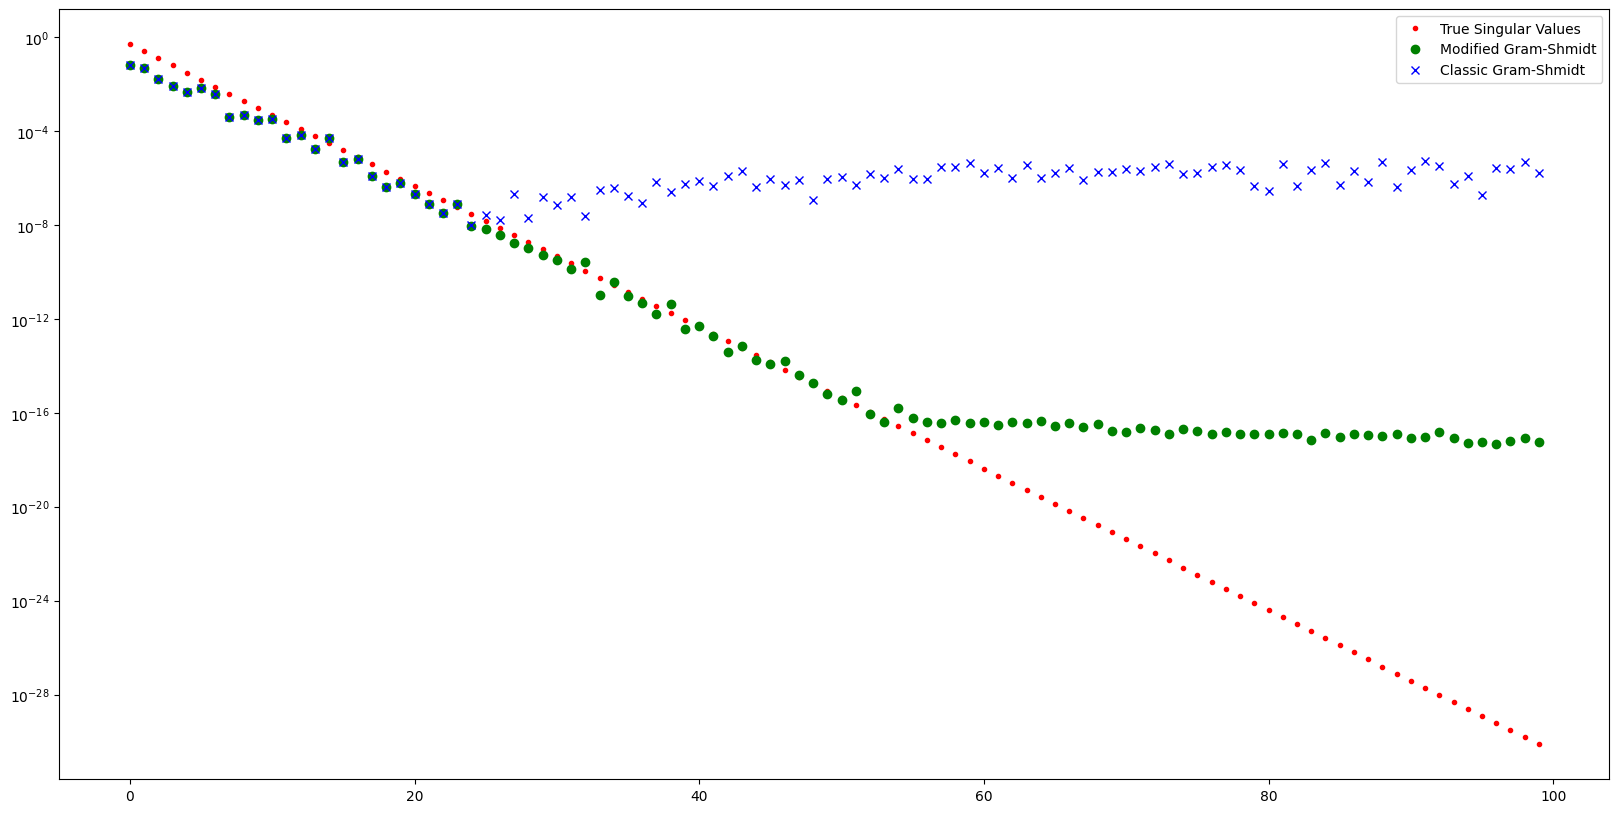

In [18]:
plt.figure(figsize=(20,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [19]:
##Your Code start here

def pure_qr(A, max_iter=50000):
    Ak = np.copy(A)
    n = A.shape[0]
    QQ = np.eye(n)
    for k in range(max_iter):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        QQ = QQ @ Q
        if k == 1 or k == 5 or k == 10 or k == 20 or k == 100 :
            print("Iteration number = ", k, ":")
            print(Ak)
            print("\n")
    return Ak, QQ

##Your Code ends here

In [20]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
Ak, Q = pure_qr(A)
# np.linalg.eigvals(A)

##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
Iteration number =  1 :
[[ 2.4444 -0.5984  0.      0.    ]
 [-0.5984  1.7969 -0.1034  0.    ]
 [ 0.     -0.1034 -0.2414  0.    ]
 [ 0.      0.      0.      3.    ]]


Iteration number =  5 :
[[ 2.7995 -0.0573  0.      0.    ]
 [-0.0573  1.4475 -0.0001  0.    ]
 [ 0.     -0.0001 -0.247   0.    ]
 [ 0.      0.      0.      3.    ]]


Iteration number =  10 :
[[ 2.8019 -0.0021 -0.      0.    ]
 [-0.0021  1.445  -0.      0.    ]
 [ 0.     -0.     -0.247   0.    ]
 [ 0.      0.      0.      3.    ]]


Iteration number =  20 :
[[ 2.8019 -0.     -0.      0.    ]
 [-0.      1.445  -0.      0.    ]
 [ 0.     -0.     -0.247   0.    ]
 [ 0.      0.      0.      3.    ]]


Iteration number =  100 :
[[ 2.8019 -0.     -0.      0.    ]
 [-0.      1.445  -0.      0.    ]
 [ 0.     -0.     -0.247   0.    ]
 [ 0.      0.      0.      3.    ]]




In [21]:
Ak

array([[ 2.8019,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.445 , -0.    ,  0.    ],
       [ 0.    ,  0.    , -0.247 ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  3.    ]])

In [22]:
EigVal = np.diag(Ak)
print(EigVal)

[ 2.8019  1.445  -0.247   3.    ]


In [23]:
print(np.linalg.eig(A)[0])

[-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compress_image(image_filename, r_values):
    # Load image
    image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

    # original image
    plt.figure(figsize=(15, 15))
    plt.subplot(1, len(r_values) + 1, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    # Compute SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    psnr_values = []
    plt.figure(figsize=(30, 5))
    for r in r_values:
        # Truncate matrices U, S, and Vt to keep only the first r columns
        Ur = U[:, :r]
        Sr = np.diag(S[:r])
        Vtr = Vt[:r, :]

        compressed_image = np.dot(Ur, np.dot(Sr, Vtr))
        mse = np.mean((image - compressed_image) ** 2)
        psnr = 20 * np.log10(255 / np.sqrt(mse))
        psnr_values.append(psnr)

        # compressed image
        plt.subplot(1, len(r_values) + 1, r_values.index(r) + 2)
        plt.title(f'r={r}, PSNR={psnr:.2f}')
        plt.imshow(compressed_image, cmap='gray')

    # PSNR diagram
    plt.figure(figsize=(10, 5))
    plt.plot(r_values, psnr_values, marker='o')
    plt.title('PSNR vs r')
    plt.xlabel('r (Number of Singular Values)')
    plt.ylabel('PSNR (dB)')
    plt.show()

    return psnr_values



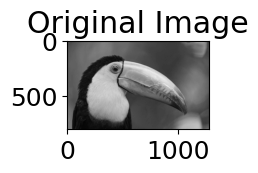

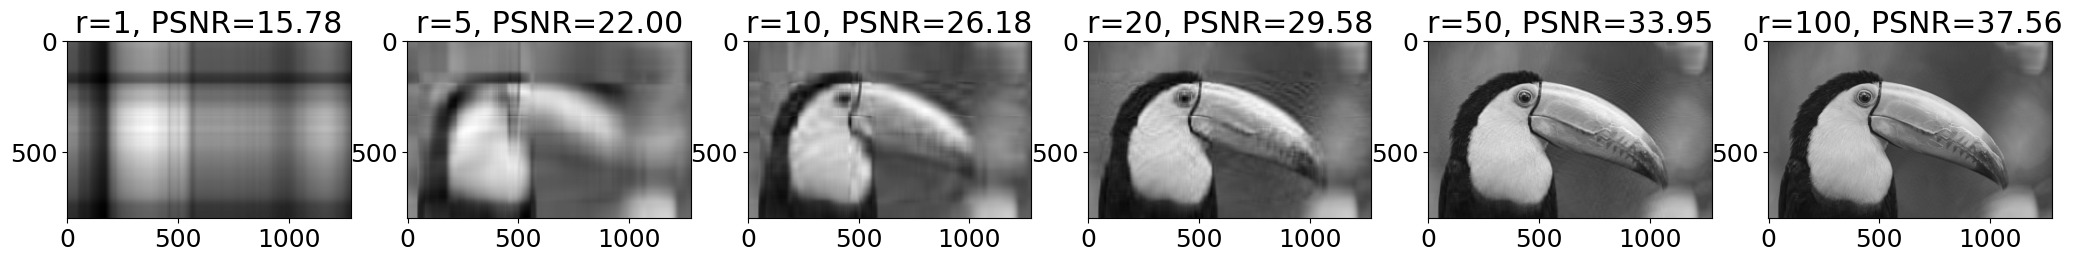

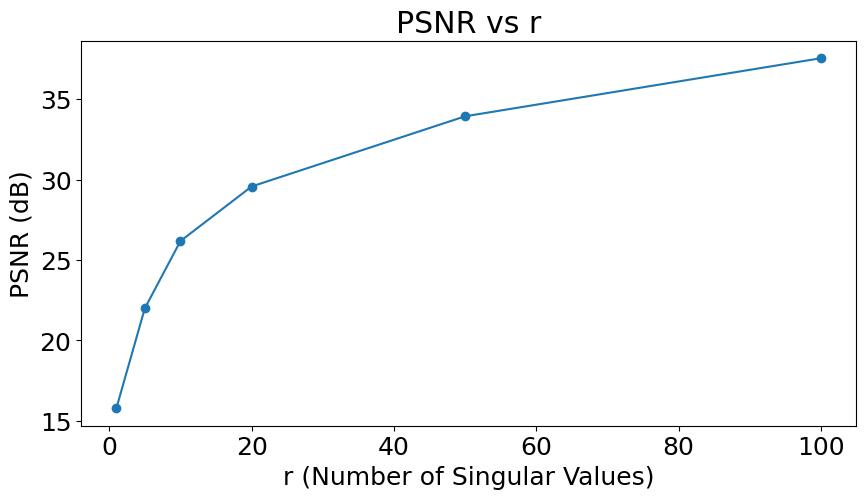

PSNR values: [15.779751234373759, 22.001580562698173, 26.18180899586865, 29.57760161635468, 33.94667276858162, 37.56142091243224]


In [25]:
image_filename = 'pic.jpg'
r_values = [1, 5, 10, 20, 50, 100]
psnr_values = compress_image(image_filename, r_values)

print("PSNR values:", psnr_values)


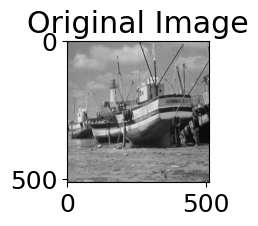

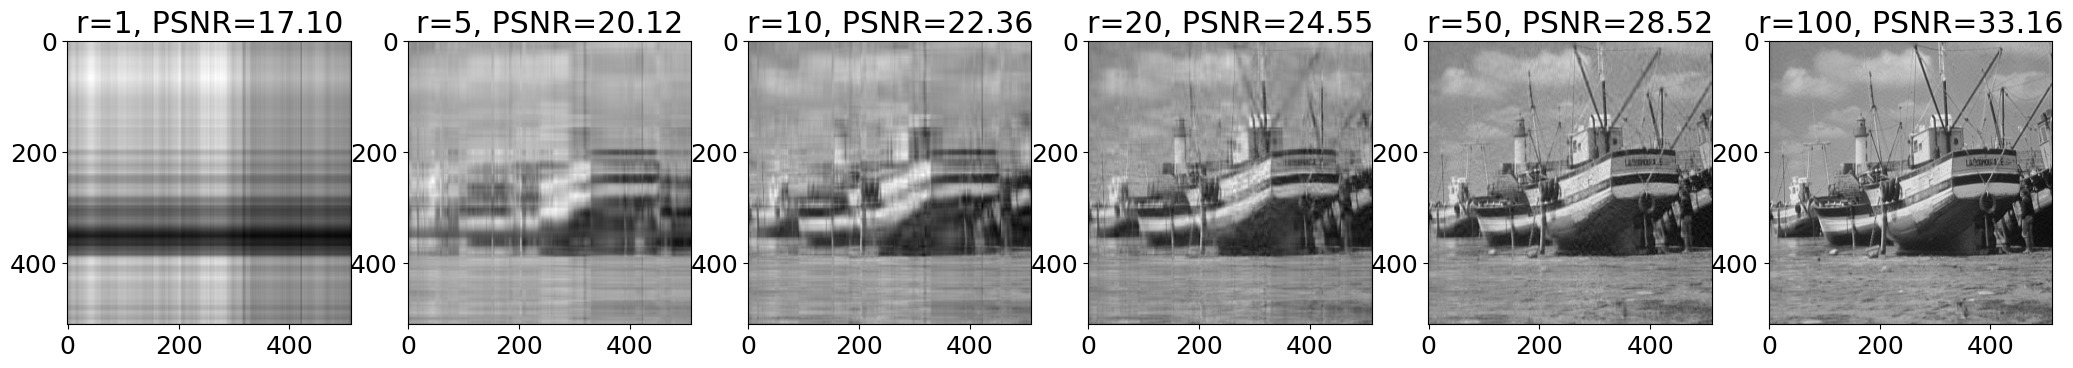

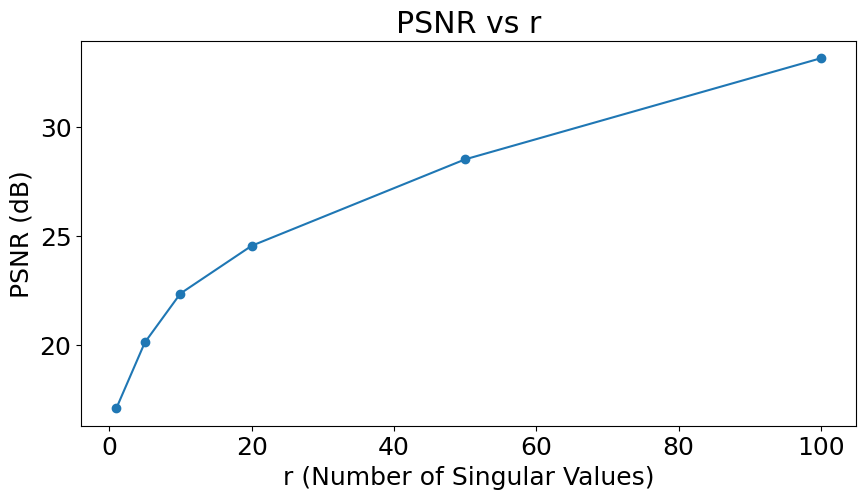

PSNR values: [17.09732000231845, 20.116293985018537, 22.36238326749815, 24.551511078447255, 28.519114093705696, 33.16157764596742]


In [26]:
image_filename = 'boat.png'
r_values = [1, 5, 10, 20, 50, 100]
psnr_values = compress_image(image_filename, r_values)

print("PSNR values:", psnr_values)


###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


# First approeach:

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    salt_pixels = np.random.choice(total_pixels, int(total_pixels * salt_prob))
    noisy_image.flat[salt_pixels] = 255

    # Add pepper noise
    pepper_pixels = np.random.choice(total_pixels, int(total_pixels * pepper_prob))
    noisy_image.flat[pepper_pixels] = 0

    return noisy_image

def add_gaussian_noise(image, mean=0, std=25):
    row, col = image.shape
    gauss = np.random.normal(mean, std, (row, col))
    noisy_image = image + gauss

    # Clip the values to ensure they are within the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype(np.uint8)

def reduce_noise_svd(image, r_values):
    # Perform SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    # Noise reduction and PSNR calculation for different values of r
    psnr_values = []

    for r in r_values:
        # Truncate matrices U, S, and Vt to keep only the first r columns
        Ur = U[:, :r]
        Sr = np.diag(S[:r])
        Vtr = Vt[:r, :]

        # Reconstruct the denoised image
        denoised_image = np.dot(Ur, np.dot(Sr, Vtr))

        # Calculate PSNR
        mse = np.mean((image - denoised_image) ** 2)
        psnr = 20 * np.log10(255 / np.sqrt(mse))
        psnr_values.append(psnr)

    return psnr_values, denoised_image

def compare_noise_reduction(image_filename, salt_prob, pepper_prob, gaussian_std, r_values):
    # Load the original image
    original_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

    # Add salt and pepper noise
    salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

    # Add Gaussian noise
    gaussian_noisy_image = add_gaussian_noise(original_image, std=gaussian_std)

    # Perform noise reduction using SVD for salt and pepper noise
    psnr_salt_pepper, denoised_salt_pepper_image = reduce_noise_svd(salt_pepper_noisy_image, r_values)

    # Perform noise reduction using SVD for Gaussian noise
    psnr_gaussian, denoised_gaussian_image = reduce_noise_svd(gaussian_noisy_image, r_values)

    # Plot the original, noisy, and denoised images
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 4, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')

    plt.subplot(2, 4, 2)
    plt.title('Salt & Pepper Noisy Image')
    plt.imshow(salt_pepper_noisy_image, cmap='gray')

    plt.subplot(2, 4, 3)
    plt.title('Denoised (Salt & Pepper)')
    plt.imshow(denoised_salt_pepper_image, cmap='gray')

    plt.subplot(2, 4, 5)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')

    plt.subplot(2, 4, 6)
    plt.title('Gaussian Noisy Image')
    plt.imshow(gaussian_noisy_image, cmap='gray')

    plt.subplot(2, 4, 7)
    plt.title('Denoised (Gaussian)')
    plt.imshow(denoised_gaussian_image, cmap='gray')

    # Plot the PSNR diagrams
    plt.subplot(2, 4, 4)
    plt.plot(r_values, psnr_salt_pepper, marker='o')
    plt.title('PSNR (Salt & Pepper) vs r')
    plt.xlabel('r (Number of Singular Values)')
    plt.ylabel('PSNR (dB)')

    plt.subplot(2, 4, 8)
    plt.plot(r_values, psnr_gaussian, marker='o')
    plt.title('PSNR (Gaussian) vs r')
    plt.xlabel('r (Number of Singular Values)')
    plt.ylabel('PSNR (dB)')

    plt.tight_layout()
    plt.show()

    return psnr_salt_pepper, psnr_gaussian



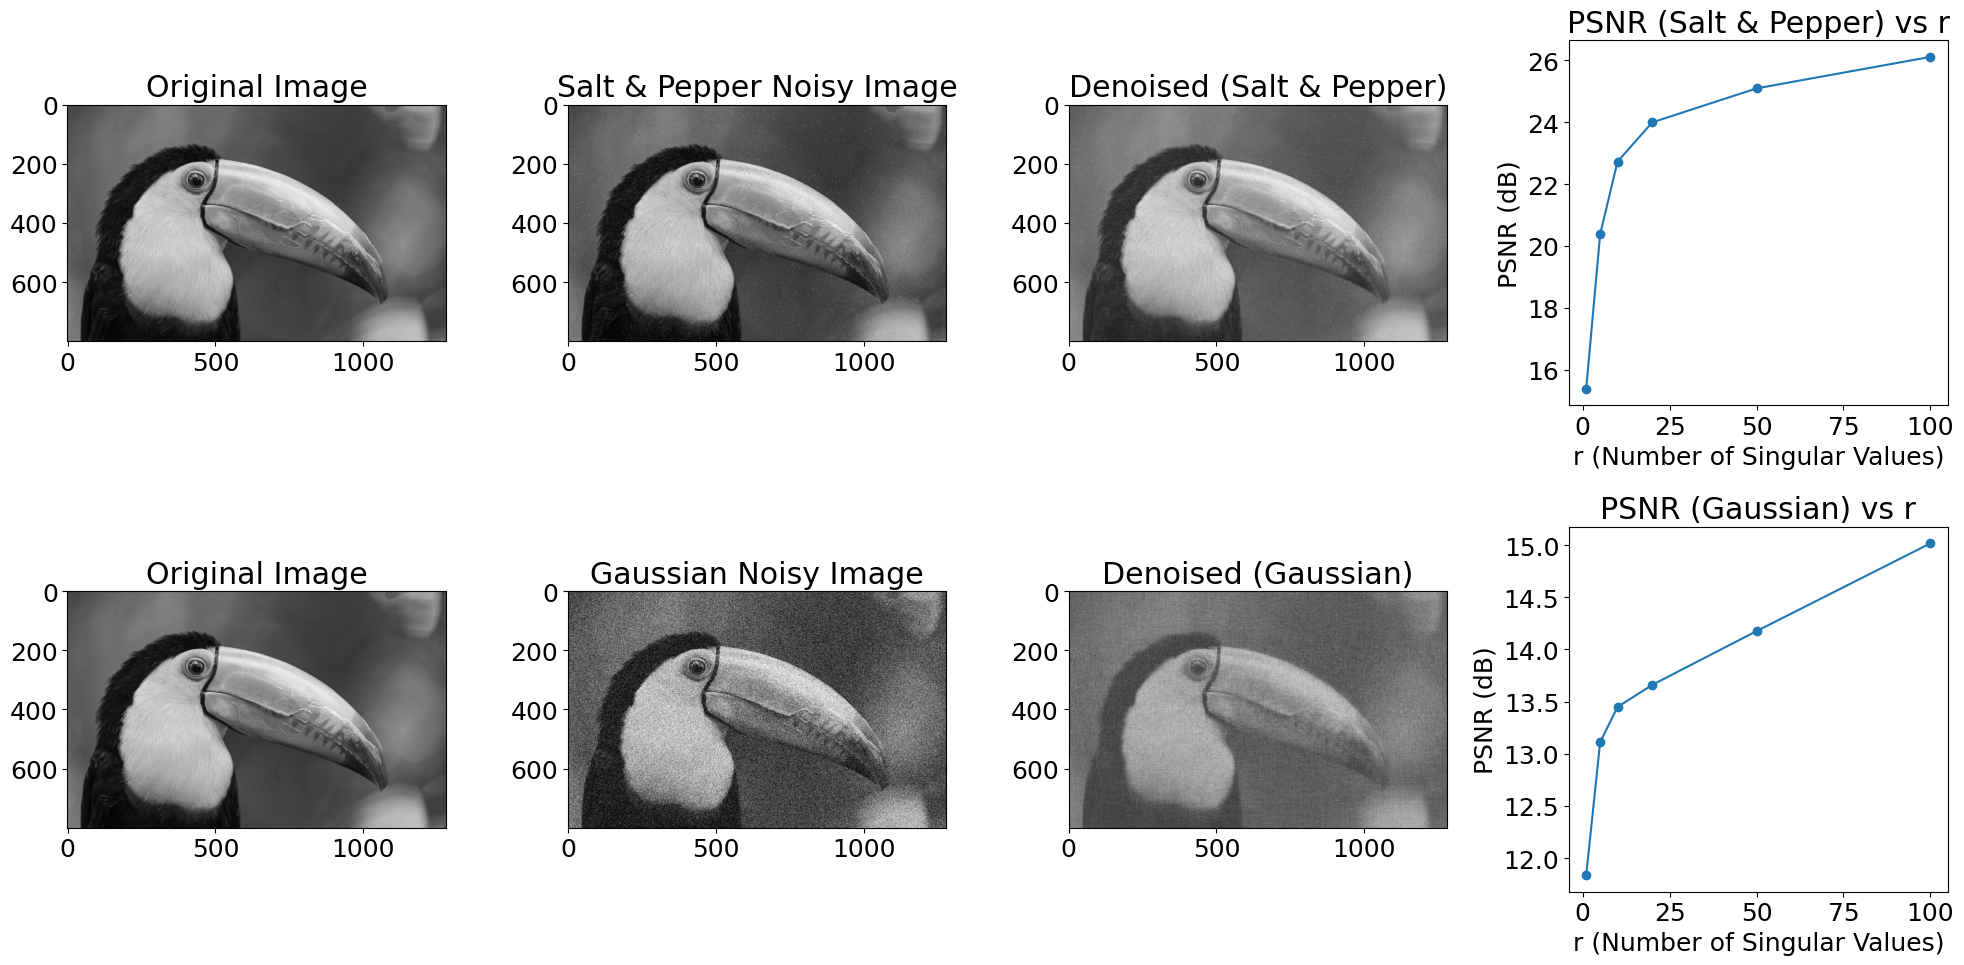

PSNR values (Salt & Pepper): [15.387816825762448, 20.374422517469224, 22.726006353188772, 23.997249995858137, 25.09610305516629, 26.113644717639573]
PSNR values (Gaussian): [11.836805138784676, 13.110583426950502, 13.448726725250399, 13.660696907888529, 14.176164148816406, 15.016772533104788]


In [28]:
image_filename = 'pic.jpg'
salt_prob = 0.005
pepper_prob = 0.005
gaussian_std = 60
r_values = [1, 5, 10, 20, 50, 100]

psnr_salt_pepper, psnr_gaussian = compare_noise_reduction(image_filename, salt_prob, pepper_prob, gaussian_std, r_values)

print("PSNR values (Salt & Pepper):", psnr_salt_pepper)
print("PSNR values (Gaussian):", psnr_gaussian)


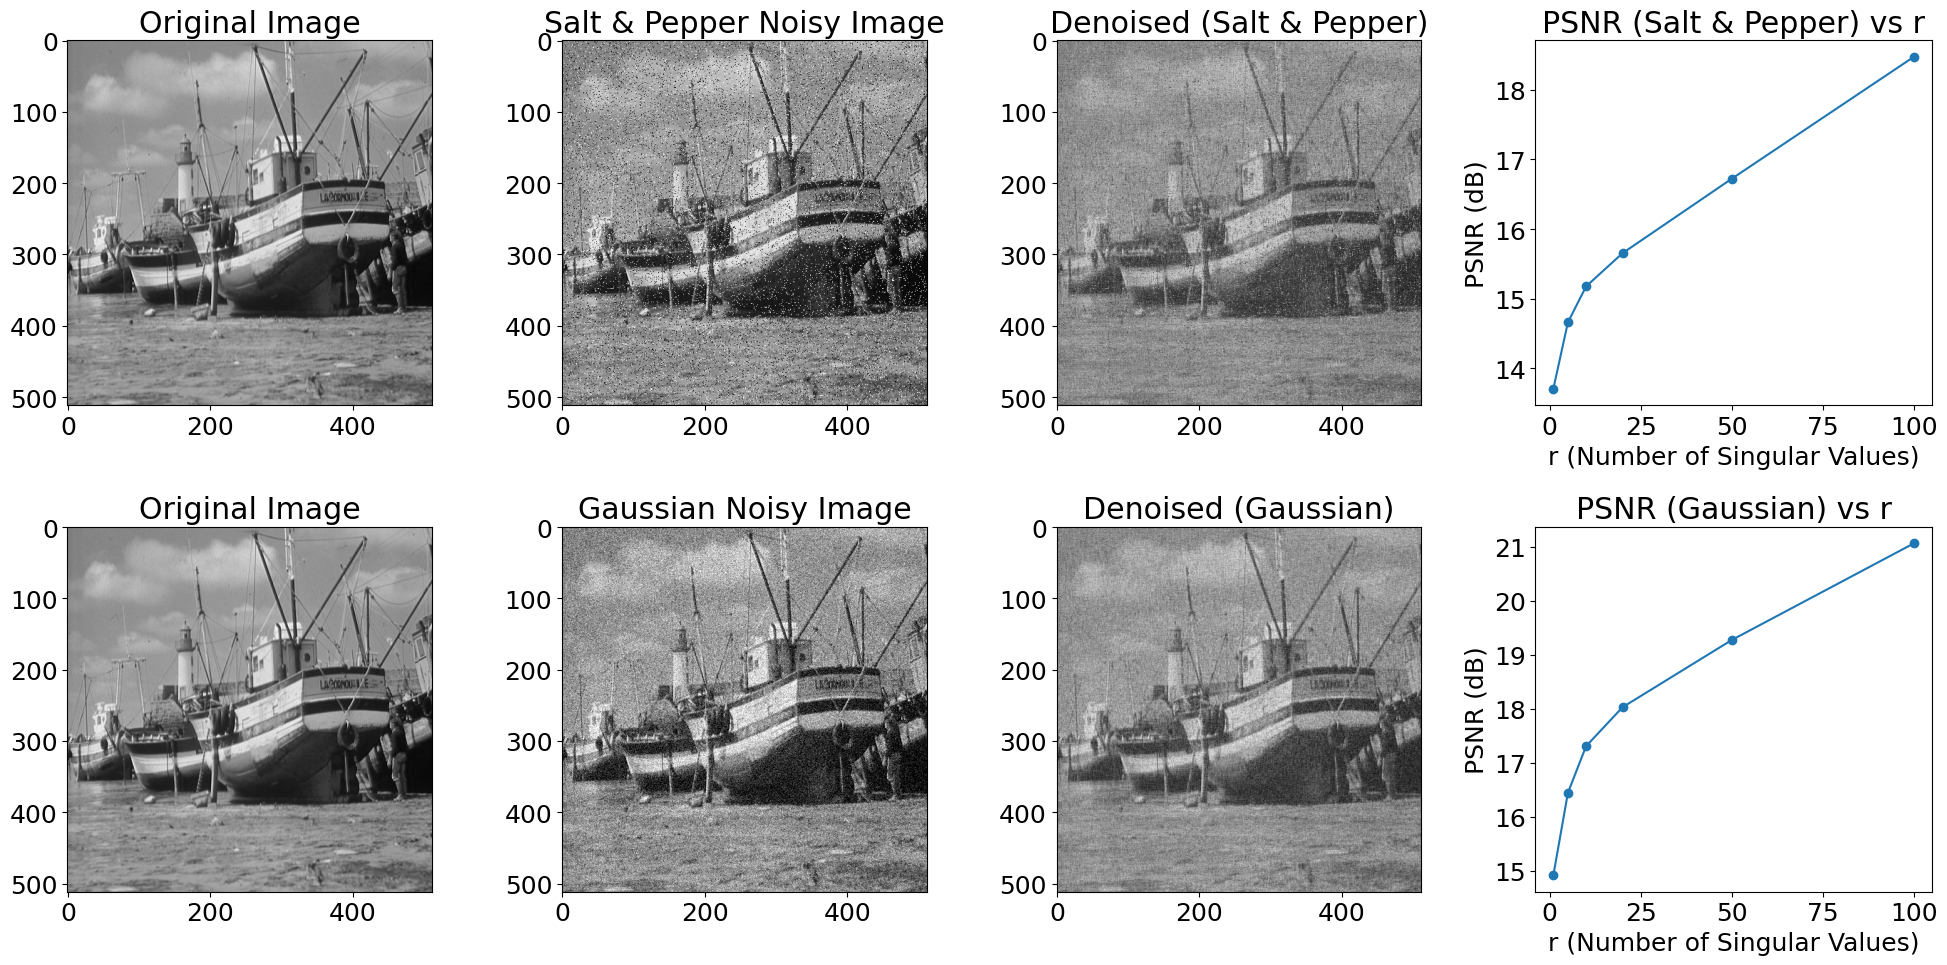

PSNR values (Salt & Pepper): [13.710116291488797, 14.662867322521201, 15.17876501356261, 15.654565547308737, 16.72320634201698, 18.472425189540964]
PSNR values (Gaussian): [14.919016304314038, 16.445485187697795, 17.30943716283184, 18.029220034031383, 19.27444092112118, 21.063887491827188]


In [29]:
image_filename = 'boat.png'
salt_prob = 0.05
pepper_prob = 0.05
gaussian_std = 30
r_values = [1, 5, 10, 20, 50, 100]

psnr_salt_pepper, psnr_gaussian = compare_noise_reduction(image_filename, salt_prob, pepper_prob, gaussian_std, r_values)

print("PSNR values (Salt & Pepper):", psnr_salt_pepper)
print("PSNR values (Gaussian):", psnr_gaussian)


# Second approeach: (Better PSNR)

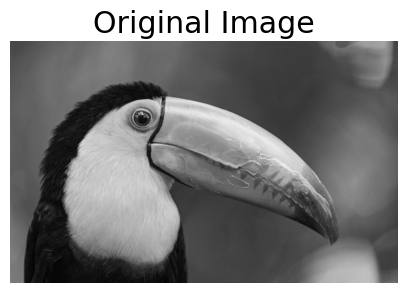

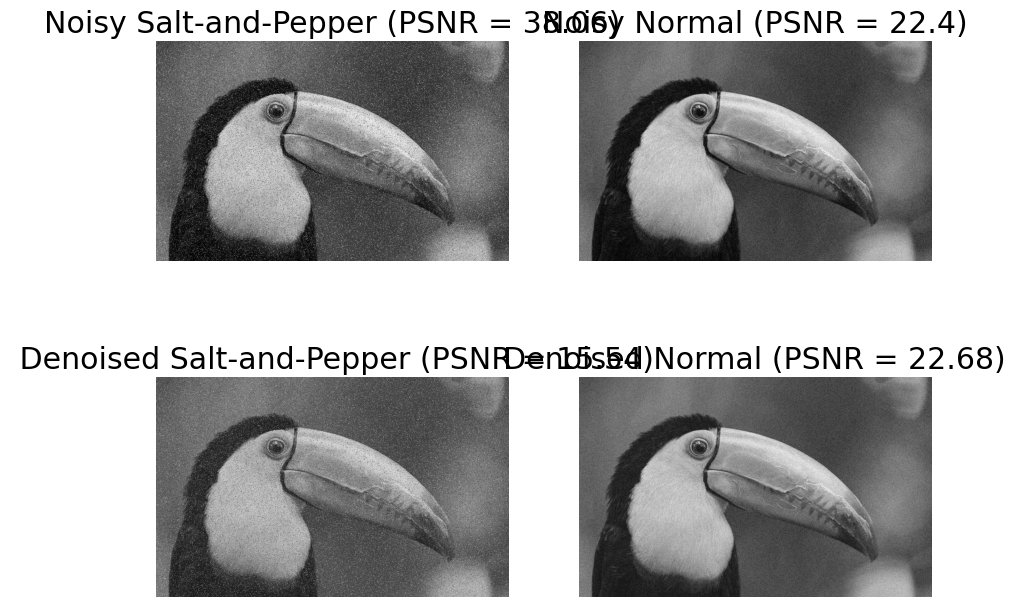

In [30]:
def addSaltAndPepperNoise(input, rate):
    result=input.copy()
    (m, n) = input.shape
    num=int(m*n*rate)
    xs = np.random.randint(0,m,size=num)
    ys = np.random.randint(0,n,size=num)
    for i in range(num):
        result[xs[i], ys[i]] = int(np.floor(np.random.uniform(0,2)))*255

    return result

def addGaussianNoise(input, std):
    result=input.copy()
    (m, n) = input.shape
    noise = np.int_(np.random.normal(0, std,[m,n]))
    result = result+noise
    for i in range(m):
        for j in range(n):
            result[i, j]=min(255, max(0,result[i,j]))
    return result

def svdComp(input, rate):
    u, s, vh = np.linalg.svd(input,full_matrices=False)
    num = int(np.round(rate*len(s)))
    selectedArg = np.argsort(s)[::-1][:num]
    selectedS = s[selectedArg]
    selectedU = u[:,selectedArg]
    selectedVh =vh[selectedArg,:]
    result = np.floor((selectedU*selectedS) @ selectedVh)
    return result

def psnr(input, output):
    m, n = input.shape
    diff=input-output
    diff=diff * diff
    mse = np.sum(diff)
    mse/=(m*n)
    result=20*np.log10(255)- 10*np.log10(mse)
    return result

image_filename = 'pic.jpg'
original_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

pic1SaPNoise = addSaltAndPepperNoise(original_image, 0.1)
pic1NormalNoise = addGaussianNoise(original_image, 20)

plt.figure(figsize=(5,8))

plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.axis('off');


plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(pic1SaPNoise,cmap='gray')
plt.title('Noisy Salt-and-Pepper (PSNR = '+ str(round(psnr(original_image, pic1SaPNoise),2)) + ')')
plt.axis('off');


plt.subplot(2,2,2)
plt.imshow(pic1NormalNoise,cmap='gray')
plt.title('Noisy Normal (PSNR = '+ str(round(psnr(original_image, pic1NormalNoise),2)) + ')')
plt.axis('off');


plt.subplot(2,2,3)
sapDenoise = svdComp(pic1SaPNoise,0.8)
plt.imshow(sapDenoise,cmap='gray')
plt.title(' Denoised Salt-and-Pepper (PSNR = '+ str(round(psnr(original_image, sapDenoise),2)) + ')')
plt.axis('off');


plt.subplot(2,2,4)
normalDenoise = svdComp(pic1NormalNoise,0.7)
plt.imshow(normalDenoise,cmap='gray')
plt.title('Denoised Normal (PSNR = '+ str(round(psnr(original_image, normalDenoise),2)) + ')')
plt.axis('off');

# Conclusion:
As observed, after applying operations that preserve 30% of the outlier values in the Normal noise, we achieved a higher PSNR compared to the initial state. Additionally, its PSNR, despite initially being lower than that of the salt-and-pepper noise, increased in the end. This indicates that it performs better in Normal noise and even degrades further in salt-and-pepper noise, showcasing its better performance in handling Normal noise and a deteriorated performance in salt-and-pepper noise.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [32]:
Datapoint = pd.read_csv('Datapoint.csv', header=None)
Datapoint

0     1     2     3    4     5     6     7     8      9     10    11  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
177  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

       12  
0    1065  
1    1050  
2    1185  
3    1480  
4     735  
..    ...  
173   740  
174   750  
175   835  
176   840  
177   560  

[178 rows x 13 columns]

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

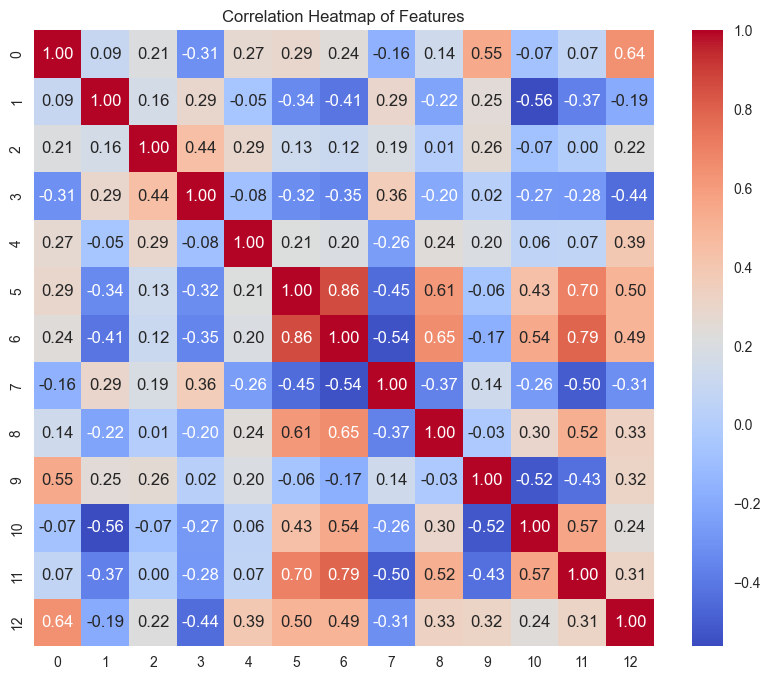

In [33]:
##Your Code start here

plt.figure(figsize=(10, 8))
sns.heatmap(Datapoint.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


##Your Code ends here

###  Data Preprocessing

In [34]:
Datapoint.head()

0     1     2     3    4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     12  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

In [35]:
##Your Code start here

##Your Code ends here

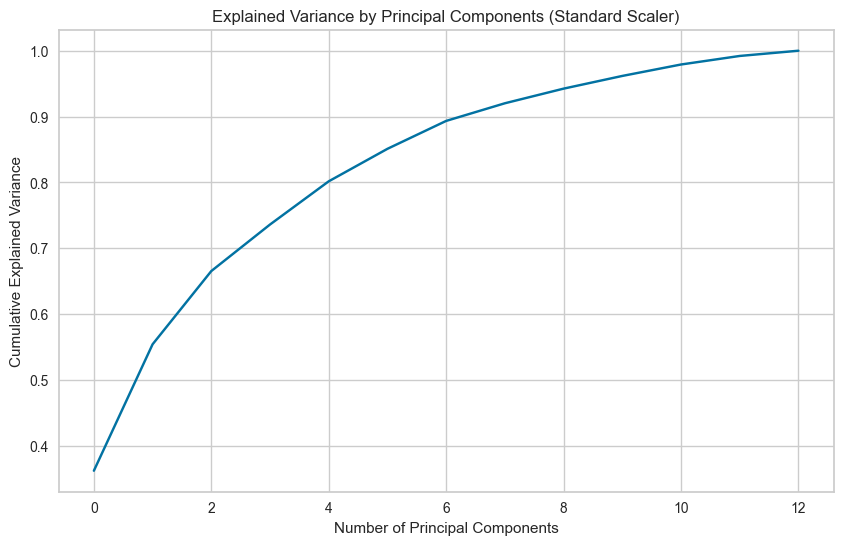

In [36]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
datapoint_scaled = scaler.fit_transform(Datapoint)

cov_matrix = np.cov(datapoint_scaled, rowvar=False)

# Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Standard Scaler)')
plt.show()


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [37]:
##Your Code start here

##Your Code ends here

In [38]:

n_components = 3  # Adjusted based on analysis
top_eigenvectors = eigenvectors[:, :n_components]

# Project the original data onto feature space
datapoint_pca = np.dot(datapoint_scaled, top_eigenvectors)

columns_pca = [f'PC{i+1}' for i in range(n_components)]
datapoint_pca_df = pd.DataFrame(datapoint_pca, columns=columns_pca)


print(datapoint_pca_df.head())


        PC1       PC2       PC3
0 -3.316751 -1.443463 -0.165739
1 -2.209465  0.333393 -2.026457
2 -2.516740 -1.031151  0.982819
3 -3.757066 -2.756372 -0.176192
4 -1.008908 -0.869831  2.026688


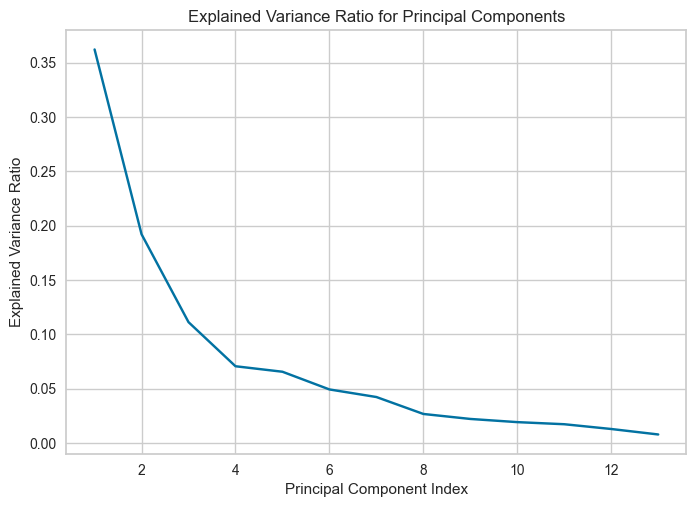

The number of principal components is 8


In [48]:

##Your Code start here


# Scaling data using Standard Scaler
standard_scaled_dataset = StandardScaler().fit_transform(Datapoint)

# Calculating the covariance matrix and finding principal components
covariance_matrix = np.cov(standard_scaled_dataset, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Plotting explained variance ratio for each principal component
sum_of_eigenvalues = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / sum_of_eigenvalues
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

# Finding the number of principal components to explain 90% of the variance
cumulative_sum = 0
num_principal_components = 0

while True:
    cumulative_sum += explained_variance_ratio[num_principal_components]
    num_principal_components += 1
    if cumulative_sum >= 0.9:
        break

# Extracting the principal components
principal_components = eigenvectors[:, :num_principal_components]

# Projecting data into principal components
projected_data = np.matmul(standard_scaled_dataset, principal_components)

print("The number of principal components is %d" % num_principal_components)
  
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

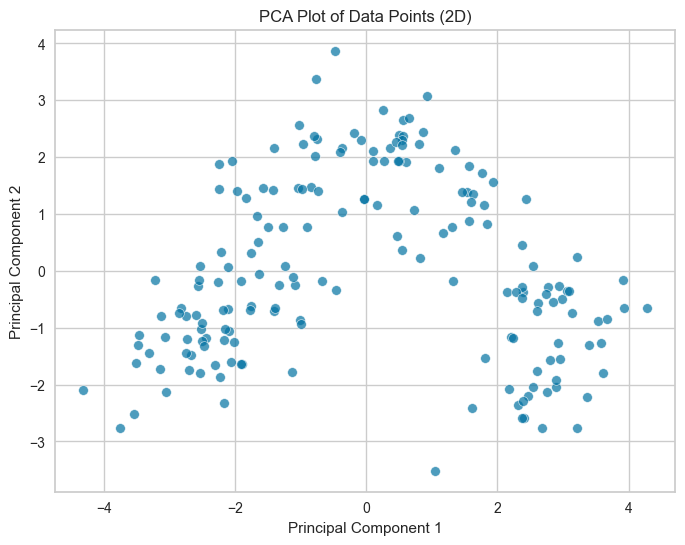

In [40]:
##Your Code start here


# 2D Plot
plt.figure(figsize=(8, 6))
plt.scatter(datapoint_pca_df['PC1'], datapoint_pca_df['PC2'], alpha=0.7, edgecolors='w', linewidths=0.5)
plt.title('PCA Plot of Data Points (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



##Your Code ends here

I can guess of clustering data points into 3 different clusters.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




# First Approeach:

        PC1       PC2       PC3
0 -1.316381 -0.890663 -1.011987
1 -1.095022 -0.646293 -0.707413
2 -1.131218 -0.826658 -1.184111
3 -1.431689 -1.218376 -1.069004
4 -0.812592 -0.696937 -1.288135


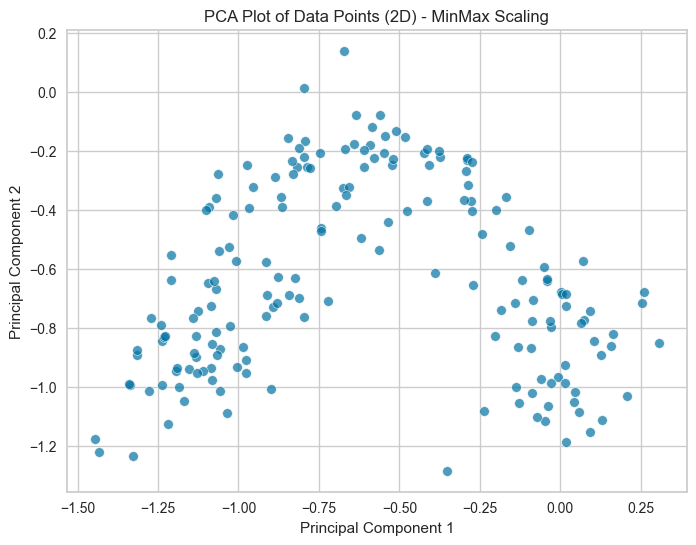

In [41]:
##Your Code start here

# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datapoint_minmax_scaled = scaler.fit_transform(Datapoint)
cov_matrix_minmax = np.cov(datapoint_minmax_scaled, rowvar=False)

# Calculate Eigenvalues and Eigenvectors
eigenvalues_minmax, eigenvectors_minmax = np.linalg.eigh(cov_matrix_minmax)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices_minmax = np.argsort(eigenvalues_minmax)[::-1]
eigenvalues_minmax = eigenvalues_minmax[sorted_indices_minmax]
eigenvectors_minmax = eigenvectors_minmax[:, sorted_indices_minmax]


n_components_minmax = 3  # Adjusted based on the analysis

top_eigenvectors_minmax = eigenvectors_minmax[:, :n_components_minmax]

# Project the original data onto feature space
datapoint_pca_minmax = np.dot(datapoint_minmax_scaled, top_eigenvectors_minmax)

columns_pca_minmax = [f'PC{i+1}' for i in range(n_components_minmax)]
datapoint_pca_minmax_df = pd.DataFrame(datapoint_pca_minmax, columns=columns_pca_minmax)

print(datapoint_pca_minmax_df.head())

# 2D Plot 
plt.figure(figsize=(8, 6))
plt.scatter(datapoint_pca_minmax_df['PC1'], datapoint_pca_minmax_df['PC2'], alpha=0.7, edgecolors='w', linewidths=0.5)
plt.title('PCA Plot of Data Points (2D) - MinMax Scaling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Your Code ends here

# Second Approeach:

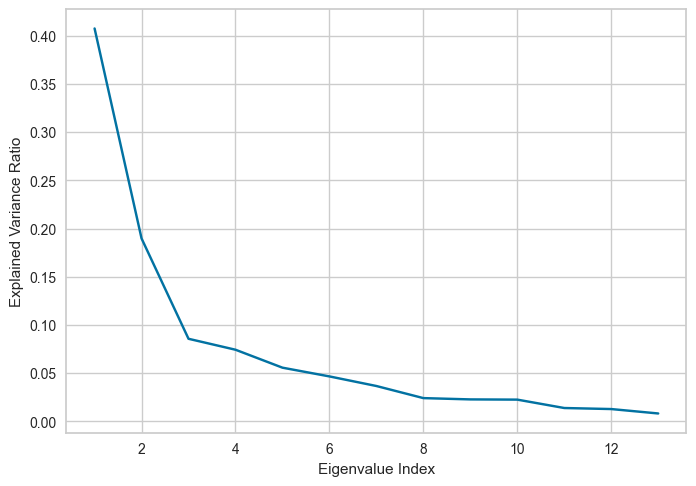

The number of principal components is 8


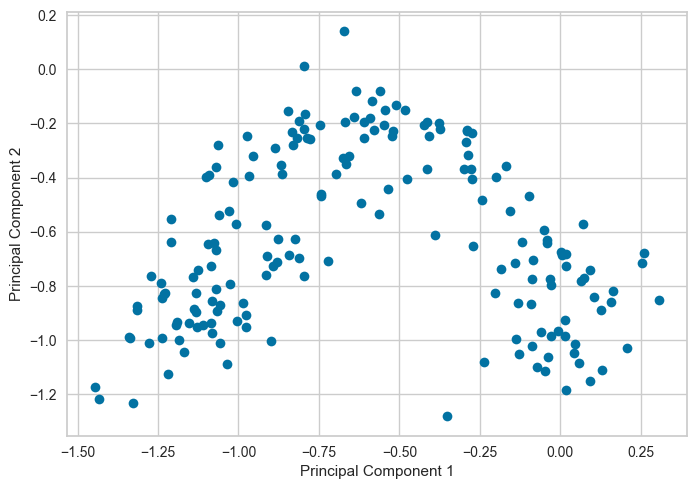

In [43]:
# Scale the dataset using Min-Max scaling
scaled_dataset = MinMaxScaler().fit_transform(Datapoint)

# Calculate the covariance matrix
covariance_matrix = np.cov(scaled_dataset, rowvar=False)

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance ratio for each eigenvalue
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Determine the number of principal components needed to explain 90% of the variance
cumulative_sum = 0
num_principal_components = 0

for ratio in explained_variance_ratio:
    cumulative_sum += ratio
    num_principal_components += 1
    if cumulative_sum >= 0.9:
        break

# Extract the principal components
principal_components = eigenvectors[:, :num_principal_components]

print("The number of principal components is %d" % num_principal_components)

# Project the data into the principal components
projected_data2 = np.matmul(scaled_dataset, principal_components)

# Plot the data in the principal component space
plt.plot(projected_data2[:, 0], projected_data2[:, 1], 'o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

c:\Users\Matin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Matin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Matin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Matin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

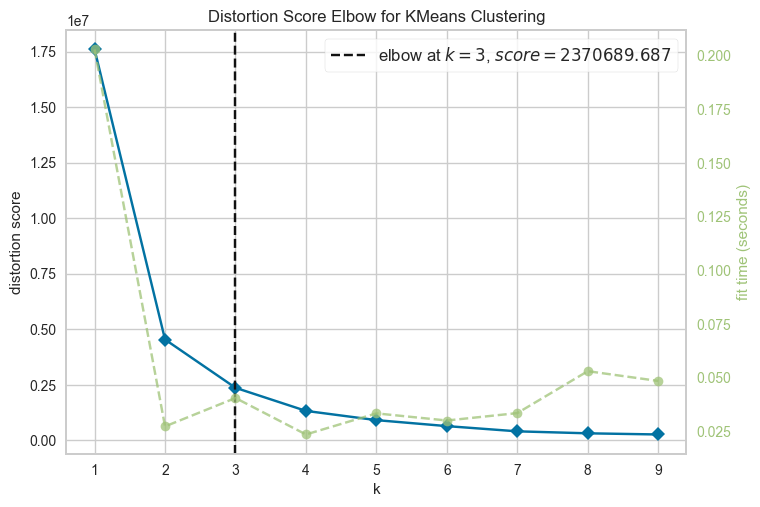

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
##Your Code start here


model = KMeans()

visualizer = KElbowVisualizer(model, k=(1, 10))  # Adjust the range of clusters as needed
visualizer.fit(Datapoint)
visualizer.show()

##Your Code ends here

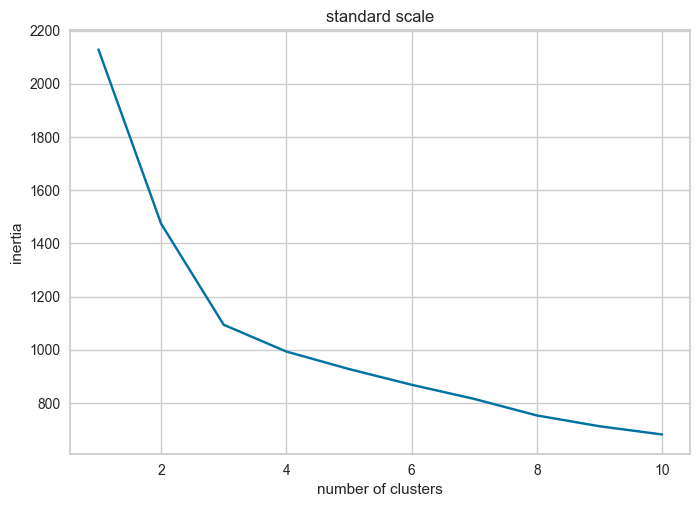

It implies that the best number of clusters using inertia is 3 !


In [85]:
inertia = []
clusters = range(1, 11)
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(projected_data)
    inertia.append(kmeans.inertia_) 

plt.plot(clusters, inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('standard scale')     
plt.show()
print('It implies that the best number of clusters using inertia is 3 !')


What is inertia and silhouette metrics?
Explain them briefly.




In [55]:
pca_std_datapoint = datapoint_pca_df
pca_std_datapoints = datapoint_pca_df

In [51]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 20.09it/s]


### Inertia Measurement

Inertia, in the context of clustering, quantifies the average squared distance between every data point and its closest centroid within a cluster. The formula for calculating inertia is expressed as:
<br> $\text{Inertia} = \sum_{i} (d(i, C_r))$<br>
where $C_r$ is the centroid of the assigned cluster for ith data and d is the squared distance.<br>
The objective in assessing inertia is to minimize its value; however, this criterion alone may not be sufficient. Hence, the elbow method is concurrently employed to enhance the evaluation of clustering effectiveness.

In [52]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 19.06it/s]


### Silhouette metrics
A metric used to evaluate how good clustering results are in data clustering.
This method examine two things together.<br>
<ul>
<li>For each data point, the computation of the average distance (a_i) to other data points within the same cluster, reflecting the similarity among data points within each cluster.


<li>For each data point, the calculation of the average distance (b_i) to all other clusters, indicating the dissimilarity of the data point compared to data points in other clusters.</li>
</ul>

$$Silhoutte \ Score = \frac{{b_i-a_i}}{{\max(a_i, b_i)}}$$
This score ranges between -1 and 1, with positive values signifying that data points appropriately belong to their respective clusters. Conversely, negative values indicate misassignments of data points to incorrect clusters. A score of zero suggests overlapping clusters.


Plot the **inertia** and **silhouette ** values

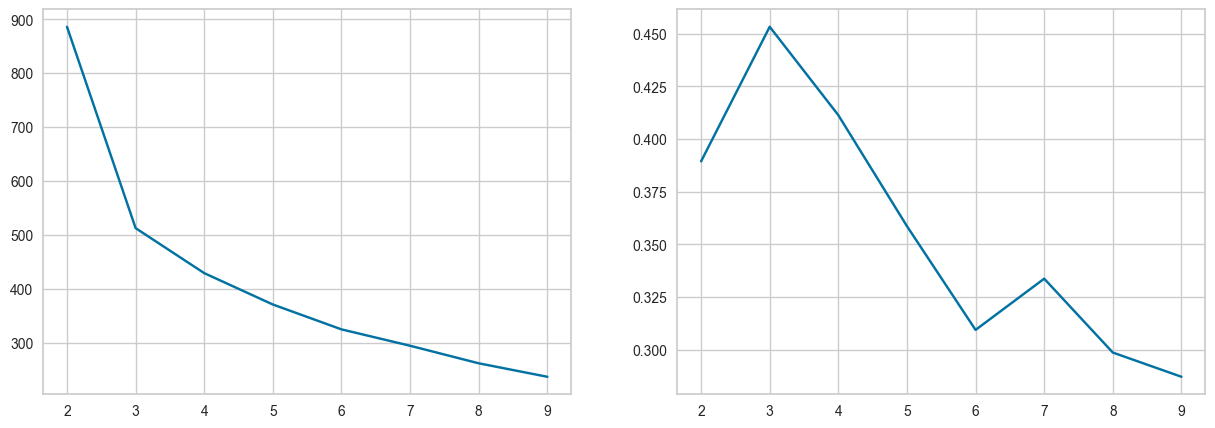

In [53]:
##Your Code start here
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(silhouette.keys(), inertia)
plt.subplot(1,2,2)
plt.plot(silhouette.keys() ,silhouette.values())

##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [56]:
model_kmeans = KMeans(n_clusters= 3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoints)


c:\Users\Matin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

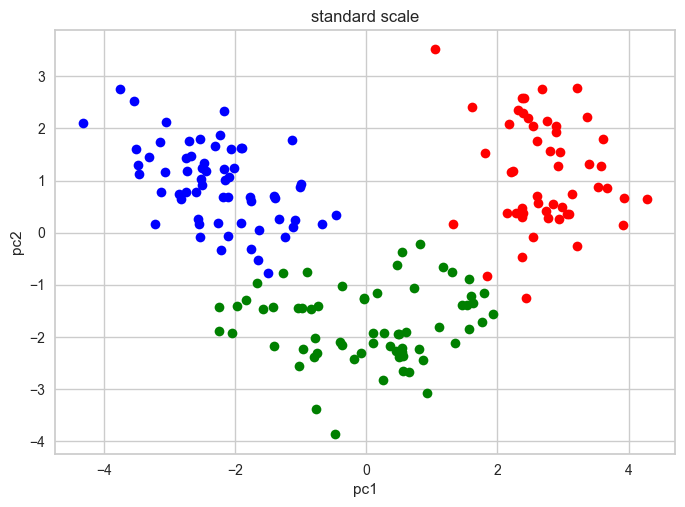

In [87]:
pca_std_datapoint = projected_data
color = ['green', 'red', 'blue']
for i in range (0, 3) :
    plt.plot(pca_std_datapoint[y_predict_kmeans1 == i, 0], pca_std_datapoint[y_predict_kmeans1 == i, 1], color[i], marker='o', linestyle='None')
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('standard scale')     
plt.show()    


Do all previous steps for MinMax scaled data points.





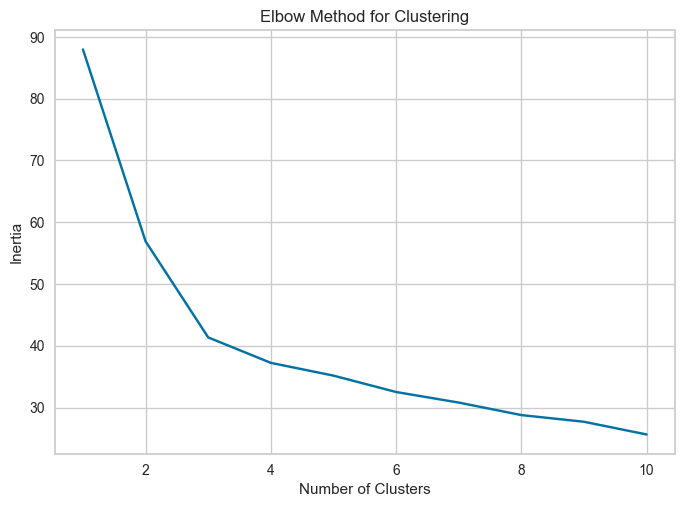

The optimal number of clusters using Inertia is 3


100%|██████████| 8/8 [00:00<00:00, 16.40it/s]


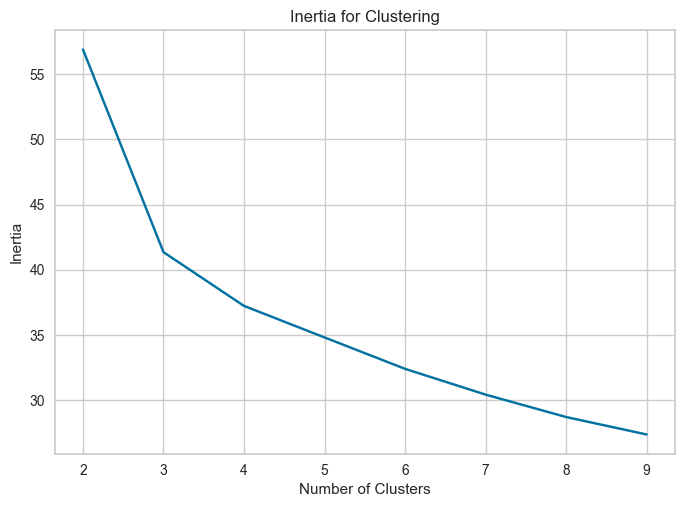

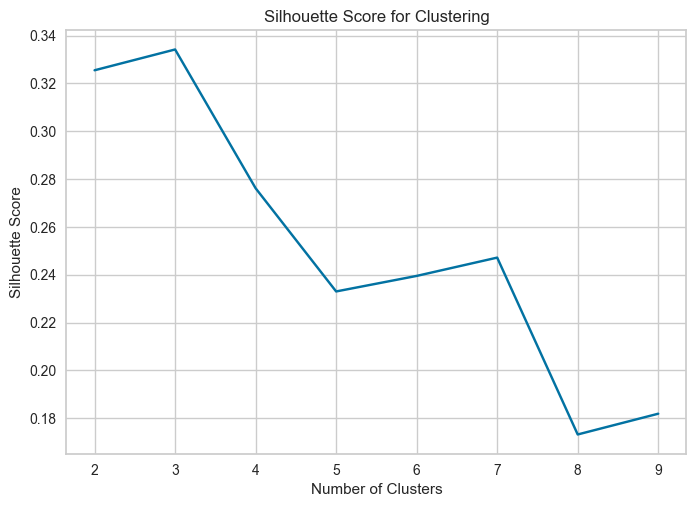

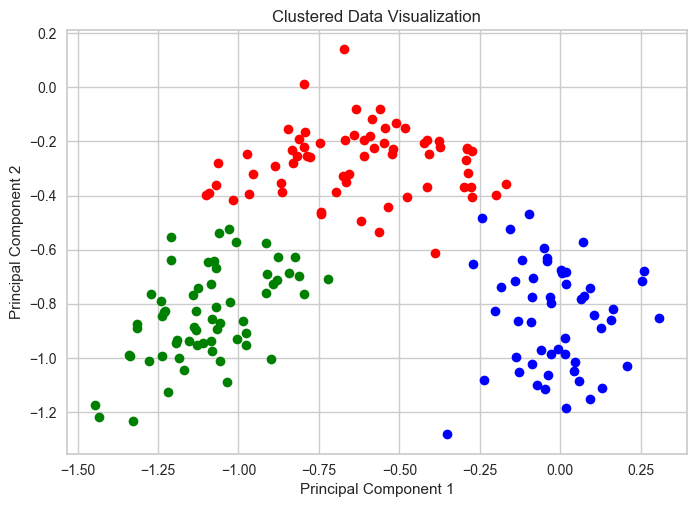

In [45]:
# Finding the optimal number of clusters using the Elbow method and Inertia
inertia_values = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans_model.fit(projected_data2)
    inertia_values.append(kmeans_model.inertia_)

# Plotting the Elbow curve
plt.plot(cluster_range, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Clustering')
plt.show()

print('The optimal number of clusters using Inertia is 3')

# Applying KMeans with different cluster numbers and evaluating Inertia and Silhouette score
inertia_values = []
silhouette_scores = {}

for num_clusters in tqdm(range(2, 10)):
    kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans_model.fit(projected_data2)
    inertia_values.append(kmeans_model.inertia_)

    # Calculate Silhouette score
    kmeans_labels = kmeans_model.labels_
    silhouette_scores[num_clusters] = sil(projected_data2, kmeans_labels, metric='euclidean')

# Plotting Inertia for different cluster numbers
plt.plot(range(2, 10), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Clustering')
plt.show()

# Plotting Silhouette score for different cluster numbers
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Clustering')
plt.show()

# Visualizing the clustered data with the optimal number of clusters (3)
optimal_num_clusters = 3
kmeans_optimal_model = KMeans(n_clusters=optimal_num_clusters, random_state=17, init='k-means++', n_init=3)
labels_optimal = kmeans_optimal_model.fit_predict(projected_data2)

# Plotting the clustered data
colors = ['green', 'red', 'blue']
for cluster_label, color in zip(range(optimal_num_clusters), colors):
    plt.plot(projected_data2[labels_optimal == cluster_label, 0],
             projected_data2[labels_optimal == cluster_label, 1],
             color, marker='o', linestyle='None')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data Visualization')
plt.show()


Compare the results of different scaling methods in a PCA problem.

Standard Scaler:

- Centering and Scaling: Standard Scaler standardizes the features by removing the mean and scaling to unit variance. It centers the data around zero and adjusts the spread of the data.
- Effect on PCA: Standard Scaler is particularly effective when the features have different scales. It is suitable when the data distribution is not skewed and does not have outliers.
- Result in PCA Plot: In the PCA plot, data points are spread out, and the variance along each principal component is more consistent. The spread of points provides a clear view of the overall structure of the data.

MinMax Scaler:

- Scaling to a Range: MinMax Scaler scales the features to a specified range (default is [0, 1]). It transforms the data to a specific interval, preserving the relative distances between data points.
- Effect on PCA: MinMax Scaler is useful when the features have different ranges and when the distribution of the data needs to be preserved. It is more suitable for data with a skewed distribution or when outliers are present.
- Result in PCA Plot: In the PCA plot, data points are confined to a specific range, and the variance along each principal component may vary. The spread of points is constrained to the chosen range, providing insights into the distribution pattern.

Choosing Between Them:

- Standard Scaler: Choose this when the features have different scales and the data does not exhibit significant skewness or contain outliers.

- MinMax Scaler: Choose this when preserving the relative distances between data points is crucial, especially in the presence of skewed distributions or outliers.

Let's check the practical difference out:

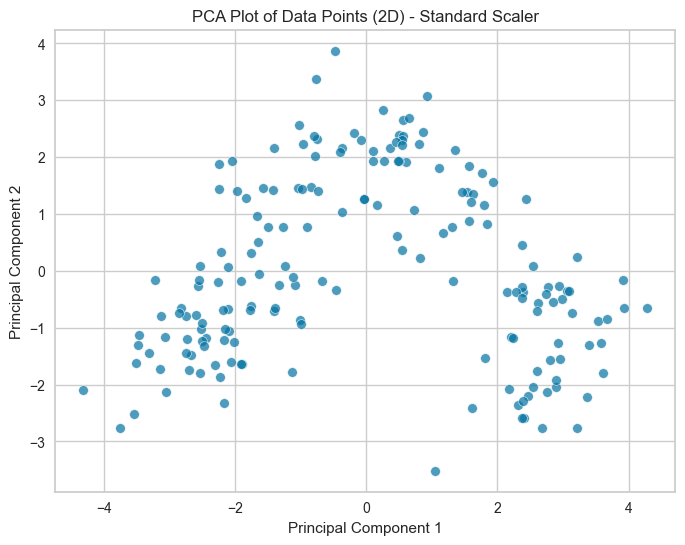

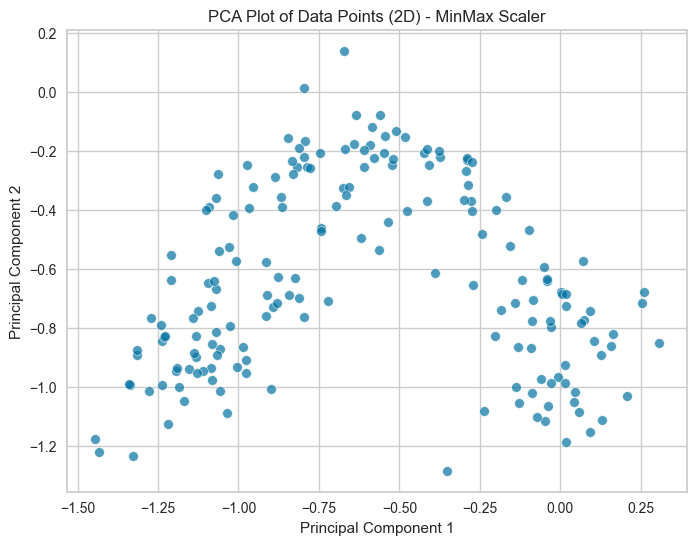

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to perform PCA and plot the 2D PCA plot
def perform_pca_and_plot(scaled_data, scaling_method):
    # Calculate Covariance Matrix
    cov_matrix = np.cov(scaled_data, rowvar=False)

    # Calculate Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Set the number of principal components based on your analysis
    n_components = 2  # Adjust this based on your analysis

    # Select the top 'n_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project the original data onto the new feature space
    datapoint_pca = np.dot(scaled_data, top_eigenvectors)

    # Create a DataFrame with the reduced features
    columns_pca = [f'PC{i+1}' for i in range(n_components)]
    datapoint_pca_df = pd.DataFrame(datapoint_pca, columns=columns_pca)

    # Plot data points in 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(datapoint_pca_df['PC1'], datapoint_pca_df['PC2'], alpha=0.7, edgecolors='w', linewidths=0.5)
    plt.title(f'PCA Plot of Data Points (2D) - {scaling_method}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Standard Scaler
scaler_standard = StandardScaler()
datapoint_standard_scaled = scaler_standard.fit_transform(Datapoint)
perform_pca_and_plot(datapoint_standard_scaled, 'Standard Scaler')

# MinMax Scaler
scaler_minmax = MinMaxScaler()
datapoint_minmax_scaled = scaler_minmax.fit_transform(Datapoint)
perform_pca_and_plot(datapoint_minmax_scaled, 'MinMax Scaler')
